- OpenClassrooms Project 7, Data Scientist
- Author : Oumeima EL GHARBI
- Date : November, December 2022

### Importing libraries

In [1]:
%reset -f

import warnings
warnings.filterwarnings(action="ignore")

# to compute time of pipeline
from time import time, strftime, gmtime

import pandas as pd
from os import listdir
from os.path import isfile, join

import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from evaluation_metrics import *

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
import sys
print("Python version {}.{}.{}".format(str(sys.version_info[0]), str(sys.version_info[1]), str(sys.version_info[2])))

Python version 3.9.7


In [3]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
output_path = "./dataset/cleaned/"

## Part III : Prediction

#### Loading dataset

In [4]:
train_file = input_path + "train.csv"
test_file = input_path + "test.csv"

train = pd.read_csv(train_file, sep=",")
test = pd.read_csv(test_file, sep=",")

target = "TARGET"
#target_dir = "energy"

X_train = train.loc[:, train.columns != 'TARGET'].iloc[:, 1:] # all rows, not target and removes SK_ID_CURR the PK
X_test = test.loc[:, test.columns != 'TARGET'].iloc[:, 1:] # all rows, not target and removes SK_ID_CURR the PK

y_train = train[target]
y_test = test[target]

In [5]:
print("The shape of the training matrix :", X_train.shape, "and this is the shape of the target vector :", y_train.shape)
print("The shape of the test matrix :", X_test.shape, "and this is the shape of the target vector :", y_test.shape)

The shape of the training matrix : (215254, 795) and this is the shape of the target vector : (215254,)
The shape of the test matrix : (92253, 795) and this is the shape of the target vector : (92253,)


#### Baseline : DummyClassifier

In [6]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84690
           1       0.00      0.00      0.00      7563

    accuracy                           0.92     92253
   macro avg       0.46      0.50      0.48     92253
weighted avg       0.84      0.92      0.88     92253

ROC-AUC 0.5


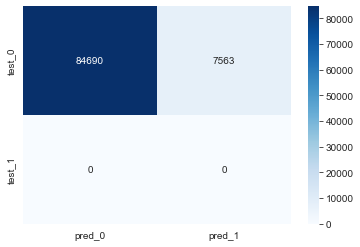

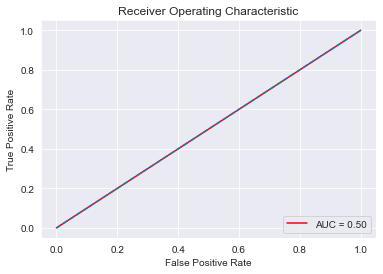

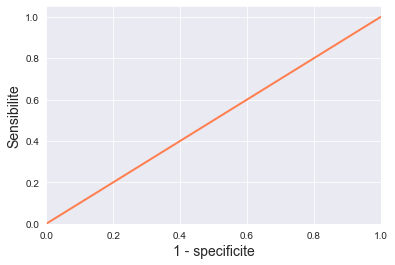

In [7]:
evaluate_classification(y_test, y_pred, y_pred_proba=y_pred)

In [8]:
results = evaluate_models("Dummy", results, y_test, y_pred)

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,Dummy,0.0,0.879,0.0,0.0,0.918,0.5


#### Hist Boost ** rename

In [9]:
from sklearn.ensemble import HistGradientBoostingClassifier
estimator = HistGradientBoostingClassifier()
estimator.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [10]:
y_pred = estimator.predict(X_test)

In [11]:
y_pred_proba = estimator.predict_proba(X_test)[:, 1]

In [12]:
y_pred_proba

array([0.02208256, 0.03977089, 0.03016153, ..., 0.19397531, 0.04577257,
       0.01910276])

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84690
           1       0.51      0.04      0.07      7563

    accuracy                           0.92     92253
   macro avg       0.71      0.52      0.51     92253
weighted avg       0.89      0.92      0.88     92253

ROC-AUC 0.517


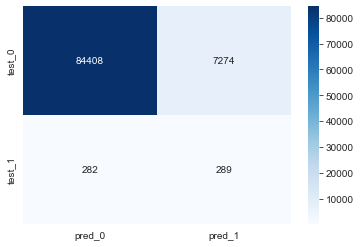

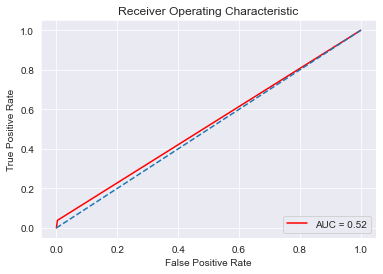

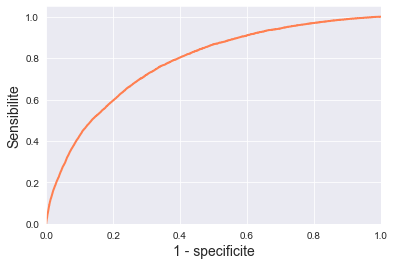

In [13]:
evaluate_classification(y_test, y_pred, y_pred_proba=y_pred_proba)

In [14]:
results = evaluate_models("HistBoost", results, y_test, y_pred)

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,HistBoost,0.071,0.885,0.506,0.038,0.918,0.517
0,Dummy,0.000,0.879,0.000,0.000,0.918,0.500


#### Logistic Regression ? clean NaN + Std

In [15]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(solver="liblinear")

#### SVM ? clean NaN + Std and no infinity !!

In [16]:
from sklearn.svm import SVC
estimator = SVC(kernel='rbf') # by default

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf.fit(X_train, y_train)

#### LightGBM

Loading LGBM
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84690
           1       0.77      0.09      0.16      7563

    accuracy                           0.92     92253
   macro avg       0.85      0.54      0.56     92253
weighted avg       0.91      0.92      0.89     92253

ROC-AUC 0.543


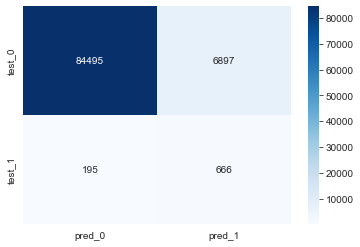

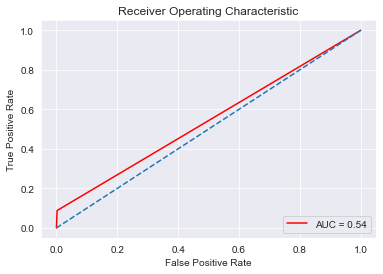

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,LightGBM_0,0.158,0.894,0.774,0.088,0.923,0.543
0,HistBoost,0.071,0.885,0.506,0.038,0.918,0.517
0,Dummy,0.000,0.879,0.000,0.000,0.918,0.500


Loading LGBM
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84690
           1       0.75      0.08      0.14      7563

    accuracy                           0.92     92253
   macro avg       0.84      0.54      0.55     92253
weighted avg       0.91      0.92      0.89     92253

ROC-AUC 0.538


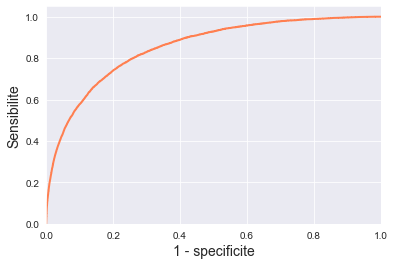

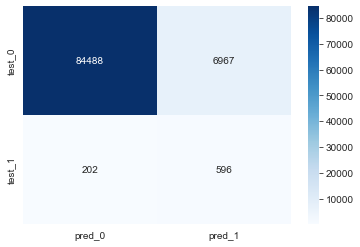

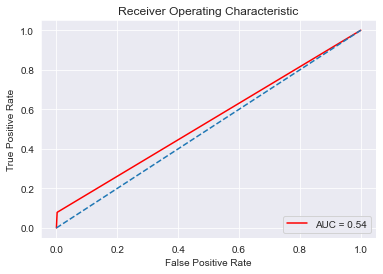

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,LightGBM_0,0.158,0.894,0.774,0.088,0.923,0.543
0,LightGBM_1,0.143,0.892,0.747,0.079,0.922,0.538
0,HistBoost,0.071,0.885,0.506,0.038,0.918,0.517
0,Dummy,0.000,0.879,0.000,0.000,0.918,0.500


Loading LGBM
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84690
           1       0.72      0.08      0.14      7563

    accuracy                           0.92     92253
   macro avg       0.82      0.54      0.55     92253
weighted avg       0.91      0.92      0.89     92253

ROC-AUC 0.539


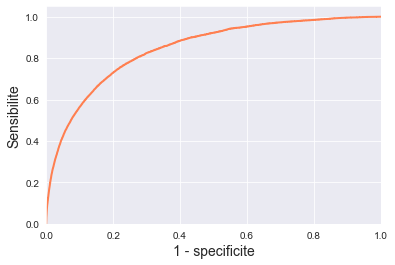

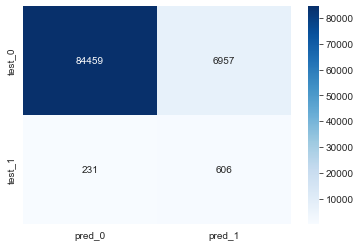

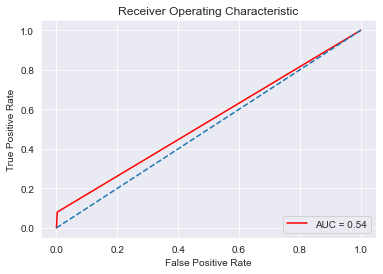

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,LightGBM_0,0.158,0.894,0.774,0.088,0.923,0.543
0,LightGBM_2,0.144,0.892,0.724,0.080,0.922,0.539
0,LightGBM_1,0.143,0.892,0.747,0.079,0.922,0.538
0,HistBoost,0.071,0.885,0.506,0.038,0.918,0.517
0,Dummy,0.000,0.879,0.000,0.000,0.918,0.500


Loading LGBM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     84690
           1       0.85      0.11      0.19      7563

    accuracy                           0.93     92253
   macro avg       0.89      0.55      0.57     92253
weighted avg       0.92      0.93      0.90     92253

ROC-AUC 0.552


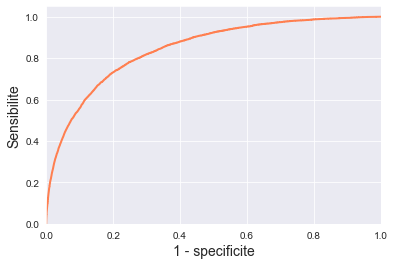

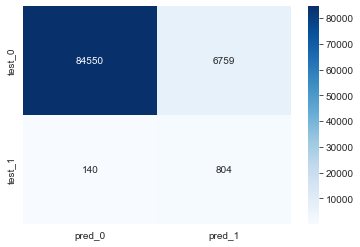

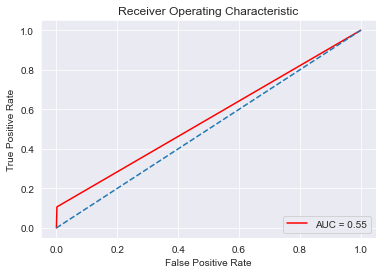

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,LightGBM_3,0.189,0.898,0.852,0.106,0.925,0.552
0,LightGBM_0,0.158,0.894,0.774,0.088,0.923,0.543
0,LightGBM_2,0.144,0.892,0.724,0.080,0.922,0.539
0,LightGBM_1,0.143,0.892,0.747,0.079,0.922,0.538
0,HistBoost,0.071,0.885,0.506,0.038,0.918,0.517
0,Dummy,0.000,0.879,0.000,0.000,0.918,0.500


Loading LGBM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     84690
           1       0.84      0.11      0.19      7563

    accuracy                           0.93     92253
   macro avg       0.88      0.55      0.57     92253
weighted avg       0.92      0.93      0.90     92253

ROC-AUC 0.552


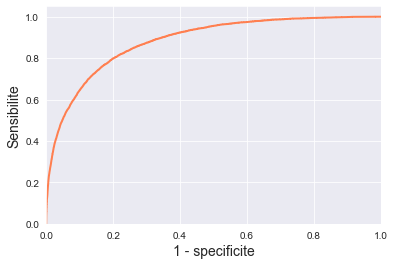

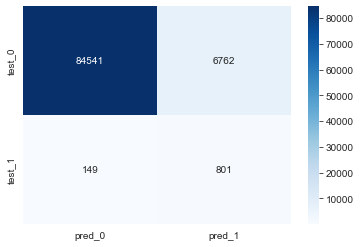

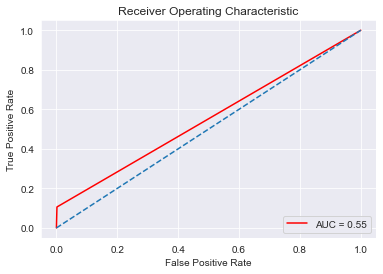

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,LightGBM_3,0.189,0.898,0.852,0.106,0.925,0.552
0,LightGBM_4,0.188,0.897,0.843,0.106,0.925,0.552
0,LightGBM_0,0.158,0.894,0.774,0.088,0.923,0.543
0,LightGBM_2,0.144,0.892,0.724,0.080,0.922,0.539
0,LightGBM_1,0.143,0.892,0.747,0.079,0.922,0.538
0,HistBoost,0.071,0.885,0.506,0.038,0.918,0.517
0,Dummy,0.000,0.879,0.000,0.000,0.918,0.500


Loading LGBM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     84690
           1       0.82      0.09      0.17      7563

    accuracy                           0.92     92253
   macro avg       0.87      0.55      0.56     92253
weighted avg       0.92      0.92      0.90     92253

ROC-AUC 0.546


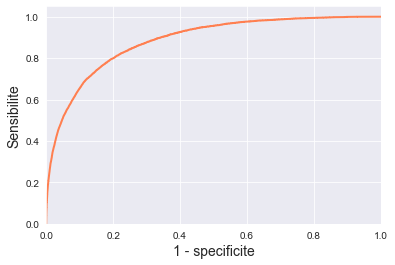

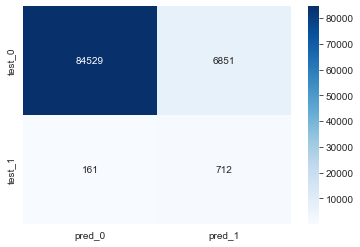

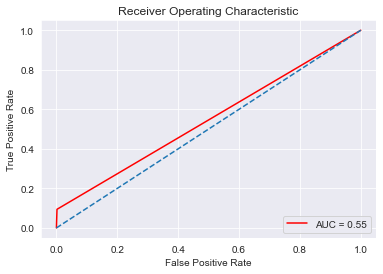

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,LightGBM_3,0.189,0.898,0.852,0.106,0.925,0.552
0,LightGBM_4,0.188,0.897,0.843,0.106,0.925,0.552
0,LightGBM_5,0.169,0.895,0.816,0.094,0.924,0.546
0,LightGBM_0,0.158,0.894,0.774,0.088,0.923,0.543
0,LightGBM_2,0.144,0.892,0.724,0.080,0.922,0.539
0,LightGBM_1,0.143,0.892,0.747,0.079,0.922,0.538
0,HistBoost,0.071,0.885,0.506,0.038,0.918,0.517
0,Dummy,0.000,0.879,0.000,0.000,0.918,0.500


Loading LGBM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     84690
           1       0.83      0.10      0.18      7563

    accuracy                           0.92     92253
   macro avg       0.88      0.55      0.57     92253
weighted avg       0.92      0.92      0.90     92253

ROC-AUC 0.548


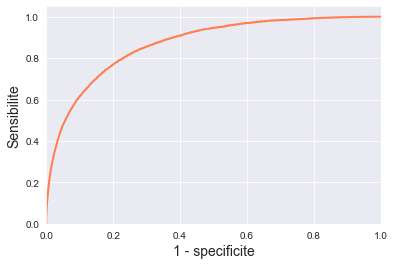

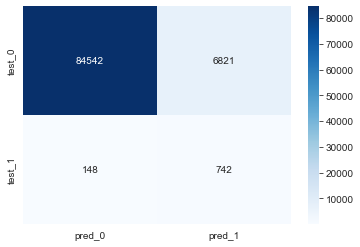

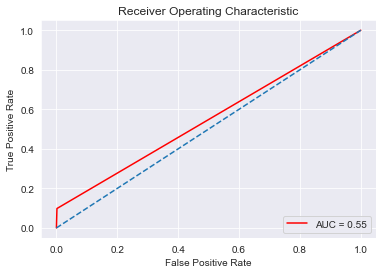

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,LightGBM_3,0.189,0.898,0.852,0.106,0.925,0.552
0,LightGBM_4,0.188,0.897,0.843,0.106,0.925,0.552
0,LightGBM_6,0.176,0.896,0.834,0.098,0.924,0.548
0,LightGBM_5,0.169,0.895,0.816,0.094,0.924,0.546
0,LightGBM_0,0.158,0.894,0.774,0.088,0.923,0.543
0,LightGBM_2,0.144,0.892,0.724,0.080,0.922,0.539
0,LightGBM_1,0.143,0.892,0.747,0.079,0.922,0.538
0,HistBoost,0.071,0.885,0.506,0.038,0.918,0.517
0,Dummy,0.000,0.879,0.000,0.000,0.918,0.500


Loading LGBM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     84690
           1       0.87      0.11      0.20      7563

    accuracy                           0.93     92253
   macro avg       0.90      0.56      0.58     92253
weighted avg       0.92      0.93      0.90     92253

ROC-AUC 0.556


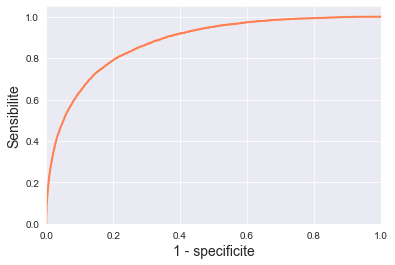

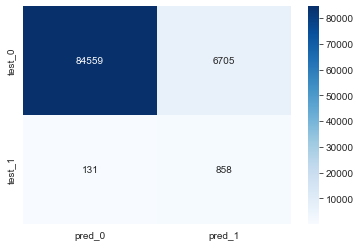

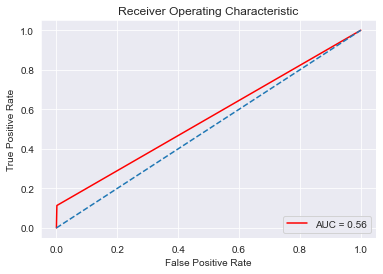

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,LightGBM_7,0.201,0.899,0.868,0.113,0.926,0.556
0,LightGBM_3,0.189,0.898,0.852,0.106,0.925,0.552
0,LightGBM_4,0.188,0.897,0.843,0.106,0.925,0.552
0,LightGBM_6,0.176,0.896,0.834,0.098,0.924,0.548
0,LightGBM_5,0.169,0.895,0.816,0.094,0.924,0.546
0,LightGBM_0,0.158,0.894,0.774,0.088,0.923,0.543
0,LightGBM_2,0.144,0.892,0.724,0.080,0.922,0.539
0,LightGBM_1,0.143,0.892,0.747,0.079,0.922,0.538
0,HistBoost,0.071,0.885,0.506,0.038,0.918,0.517
0,Dummy,0.000,0.879,0.000,0.000,0.918,0.500


Loading LGBM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     84690
           1       0.86      0.11      0.20      7563

    accuracy                           0.93     92253
   macro avg       0.89      0.56      0.58     92253
weighted avg       0.92      0.93      0.90     92253

ROC-AUC 0.556


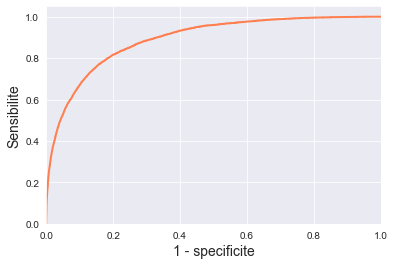

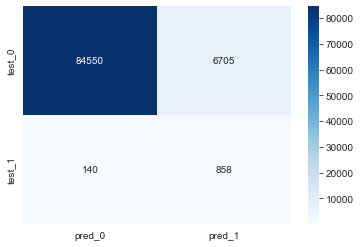

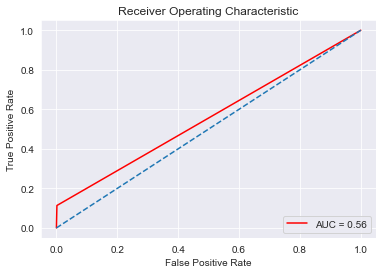

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,LightGBM_7,0.201,0.899,0.868,0.113,0.926,0.556
0,LightGBM_8,0.200,0.899,0.860,0.113,0.926,0.556
0,LightGBM_3,0.189,0.898,0.852,0.106,0.925,0.552
0,LightGBM_4,0.188,0.897,0.843,0.106,0.925,0.552
0,LightGBM_6,0.176,0.896,0.834,0.098,0.924,0.548
0,LightGBM_5,0.169,0.895,0.816,0.094,0.924,0.546
0,LightGBM_0,0.158,0.894,0.774,0.088,0.923,0.543
0,LightGBM_2,0.144,0.892,0.724,0.080,0.922,0.539
0,LightGBM_1,0.143,0.892,0.747,0.079,0.922,0.538
0,HistBoost,0.071,0.885,0.506,0.038,0.918,0.517


Loading LGBM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     84690
           1       0.83      0.10      0.18      7563

    accuracy                           0.92     92253
   macro avg       0.88      0.55      0.57     92253
weighted avg       0.92      0.92      0.90     92253

ROC-AUC 0.549


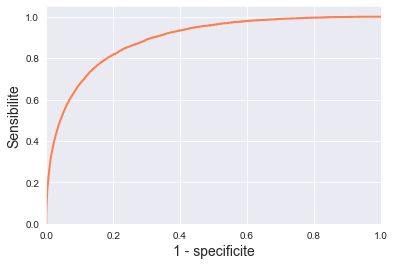

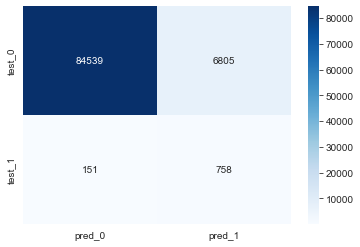

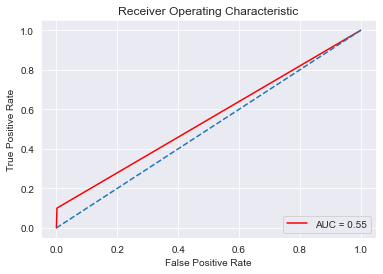

Prediction for :  TARGET


,Model,F1-score,F1-score weighted,Precision,Recall,Accuracy,ROC-AUC
0,LightGBM_7,0.201,0.899,0.868,0.113,0.926,0.556
0,LightGBM_8,0.200,0.899,0.860,0.113,0.926,0.556
0,LightGBM_3,0.189,0.898,0.852,0.106,0.925,0.552
0,LightGBM_4,0.188,0.897,0.843,0.106,0.925,0.552
0,LightGBM_9,0.179,0.896,0.834,0.100,0.925,0.549
0,LightGBM_6,0.176,0.896,0.834,0.098,0.924,0.548
0,LightGBM_5,0.169,0.895,0.816,0.094,0.924,0.546
0,LightGBM_0,0.158,0.894,0.774,0.088,0.923,0.543
0,LightGBM_2,0.144,0.892,0.724,0.080,0.922,0.539
0,LightGBM_1,0.143,0.892,0.747,0.079,0.922,0.538


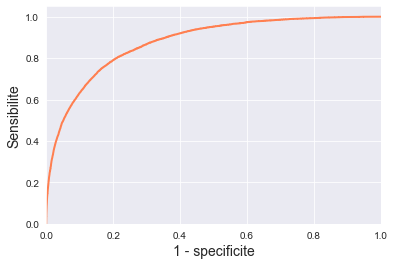

In [18]:
for i in range(10):
    # load model
    print("Loading LGBM")
    clf = joblib.load('models/LGBM/LGBMClassifier_fold_{}.joblib'.format(i))

    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1] # we take the prediction for the class 1
    evaluate_classification(y_test, y_pred, y_pred_proba=y_pred_proba)
    results = evaluate_models("LightGBM_{}".format(i), results, y_test, y_pred)

In [19]:
# save the model to disk
#print("Saving best model with joblib")
#filename_joblib = 'models/best_model.joblib'
#joblib.dump(clf, filename_joblib)

#### CV
#### GridSearch

In [23]:
X_test.shape

(92253, 795)

In [25]:
one_query = X_test.head(1)

In [44]:
type(one_query)

pandas.core.frame.DataFrame

In [49]:
one_query_ = X_test.iloc[[0]] # to select the first row as a DataFrame

In [50]:
type(one_query_)

pandas.core.frame.DataFrame

In [55]:
t = pd.concat([one_query, one_query_]).drop_duplicates(keep=False)

In [56]:
t

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT


## Part IV : API

In [57]:
HOST = 'http://127.0.0.1:8000'
#HOST = 'https://project7-api-ml.herokuapp.com'

In [20]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 828.125294 sec
computing time : 00:13:48
